In [44]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy.stats import genpareto
import scipy.stats as stats
import joypy
from scipy.stats import expon
from scipy.stats import genextreme
import matplotlib.cm as cm
import matplotlib.colors as mcolors



In [45]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

,DAY,PRECIP_QUANTITY,year,year_month,month
0,1892-01-01,1.94,1892,1892-01,1
1,1892-01-02,0.49,1892,1892-01,1
2,1892-01-03,0.00,1892,1892-01,1
3,1892-01-04,0.00,1892,1892-01,1
4,1892-01-05,0.87,1892,1892-01,1


In [46]:
#I want to regroup the years from september first to august 31st

tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()



,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


In [47]:
tp_monthly = df.groupby('year_month')['PRECIP_QUANTITY'].sum().reset_index()
tp_monthly['month']=tp_monthly['year_month'].dt.month
mean_mensual_precipitation = tp_monthly.groupby('month')['PRECIP_QUANTITY'].mean().reset_index()

#calculate the mean pecipitation of every month <9 of 2024 and from september on in 2023
first_part = df[(df['year'] == '2023') & (df['month'] > 8)].groupby('month')['PRECIP_QUANTITY'].sum().reset_index()
second_part = df[(df['year'] == '2024') & (df['month'] < 9)].groupby('month')['PRECIP_QUANTITY'].sum().reset_index()


mensual_precipitation_2024 = pd.concat([first_part,second_part],axis=0)
mean_mensual_precipitation


,month,PRECIP_QUANTITY
0,1,69.926692
1,2,57.106992
2,3,59.812857
3,4,54.296917
4,5,61.021654
5,6,67.876316
6,7,79.585489
7,8,74.038421
8,9,64.919023
9,10,70.800977


In [48]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()


,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


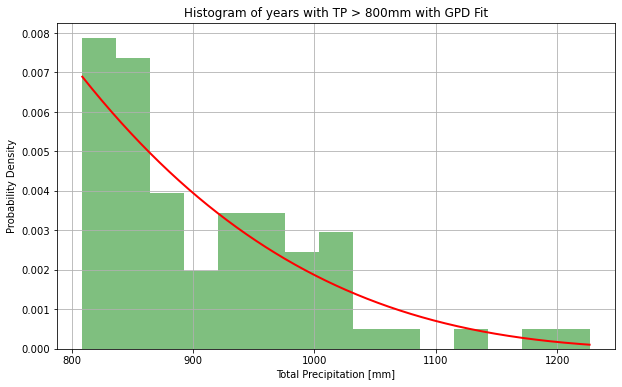

P(TP > 1227): 0.002110812003355999, Return time: 473.75133285678254


In [49]:
extreme_values=tp_seasonal_year[tp_seasonal_year['TP']>800]


shape, loc, scale = genpareto.fit(extreme_values['TP'],floc=800)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(extreme_values['TP'], bins=15, density=True, alpha=0.5, color='g', label='Histogram')

# Generate x values for the GPD curve
x = np.linspace(extreme_values['TP'].min(), extreme_values['TP'].max(), 1000)

# Plot the GPD curve
plt.plot(x, genpareto.pdf(x, shape, loc, scale), 'r-', lw=2, label='GPD fit')

# Add labels and title
plt.ylabel('Probability Density')
plt.xlabel('Total Precipitation [mm]')
plt.title('Histogram of years with TP > 800mm with GPD Fit')
plt.grid()

# Show the plot
plt.show()

x = np.linspace(1227, 10000, 1000)
y = genpareto.pdf(x, shape, loc, scale)
area = np.trapz(y, x)
p = area*len(extreme_values['TP'])/len(tp_seasonal_year)
return_time = 1/p
print(f'P(TP > 1227): {p}, Return time: {return_time}')


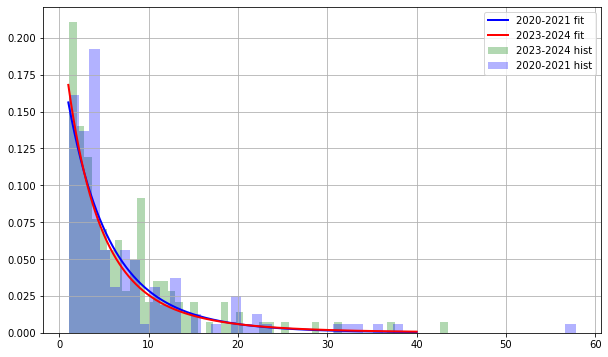

In [52]:
#merge data from september 2023 up to august 2024
tp_2023 = df[(df['year'] =='2023') & (df['month'] > 8)]
tp_2024 = df[(df['year'] == '2024') & (df['month'] < 9)]
tp_2023_2024 = pd.concat([tp_2023,tp_2024])

tp_2020 = df[(df['year'] =='2020') & (df['month'] > 8)]
tp_2021 = df[(df['year'] == '2021') & (df['month'] < 9)]
tp_2020_2021 = pd.concat([tp_2020,tp_2021])



plt.figure(figsize=(10, 6))
plt.hist(tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY']>1]['PRECIP_QUANTITY'], bins=50, density=True, alpha=0.3, color='g', label='2023-2024 hist')
plt.hist(tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY']>1]['PRECIP_QUANTITY'], bins=50, density=True, alpha=0.3, color='b', label='2020-2021 hist')

#fit an exponential
shape1,loc1,scale1 = genpareto.fit((tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY']>1]['PRECIP_QUANTITY']))
x = np.linspace(1, 40, 1000)
y1 = genpareto.pdf(x, shape1,loc1-1,scale1)
shape2,loc2,scale2 = genpareto.fit((tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY']>1]['PRECIP_QUANTITY']))
y2 = genpareto.pdf(x, shape2,loc2-1,scale2)

plt.plot(x, y1, 'b-', lw=2, label='2020-2021 fit')
plt.plot(x, y2, 'r-', lw=2, label='2023-2024 fit')
plt.grid()
#legend saying that the blue is 2020-2021 and green is 2023-2024

plt.legend()
plt.show()
#max(df[df['year']==2024]['PRECIP_QUANTITY'])

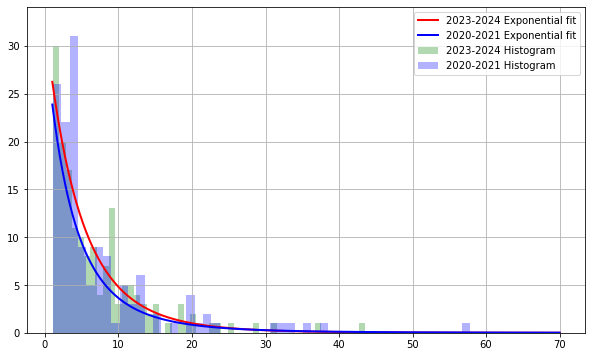

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import genpareto

# Merge data from September 2023 up to August 2024
tp_2023 = df[(df['year'] == '2023') & (df['month'] > 8)]
tp_2024 = df[(df['year'] == '2024') & (df['month'] < 9)]
tp_2023_2024 = pd.concat([tp_2023, tp_2024])

# Merge data from September 2020 up to August 2021
tp_2020 = df[(df['year'] == '2020') & (df['month'] > 8)]
tp_2021 = df[(df['year'] == '2021') & (df['month'] < 9)]
tp_2020_2021 = pd.concat([tp_2020, tp_2021])

plt.figure(figsize=(10, 6))

# Calculate histograms and densities
hist1, bins1 = np.histogram(tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'], bins=50, density=False)
hist2, bins2 = np.histogram(tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'], bins=50, density=False)

# Plot histograms
plt.hist(tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'], bins=50, density=False, alpha=0.3, color='g', label='2023-2024 Histogram')
plt.hist(tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'], bins=50, density=False, alpha=0.3, color='b', label='2020-2021 Histogram')

# Fit a Generalized Pareto Distribution
shape1, loc1, scale1 = genpareto.fit(tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'])
x = np.linspace(1, 70, 1000)
y1 = genpareto.pdf(x, shape1, loc1 - 1, scale1) * len(tp_2023_2024[tp_2023_2024['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'])
shape2, loc2, scale2 = genpareto.fit(tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'])
y2 = genpareto.pdf(x, shape2, loc2 - 1, scale2) * len(tp_2020_2021[tp_2020_2021['PRECIP_QUANTITY'] > 1]['PRECIP_QUANTITY'])

# Plot the fitted distributions
plt.plot(x, y1, 'r-', lw=2, label='2023-2024 Exponential fit')
plt.plot(x, y2, 'b-', lw=2, label='2020-2021 Exponential fit')

# Determine the maximum density value
max_density = max(max(hist1), max(hist2), max(y1), max(y2))

# Set the y-axis limit based on the maximum density value
plt.ylim(0, max_density * 1.1)  # Add a little padding

plt.grid()

# Add legend
plt.legend()

plt.show()

In [54]:
# Create an empty dataframe to store all data for plotting
data_for_joyplot = []
# Select the first 20 years and the last year
selected_years = list(tp_seasonal_year['year'][::5])
selected_years.append(tp_seasonal_year['year'].iloc[-1])
cumulative_prob=[]
# Loop through each year and compute the GPD for the precipitation
for year in selected_years:
    ano = f'{year-1}'
    ano_mas=f'{year}'  # Adjust for the year format
    tp_concat = pd.concat([df[(df['year'] == ano_mas) & (df['month'] < 9)],
                           df[(df['year'] == ano) & (df['month'] > 8)]])
    
    # Fit the Generalized Pareto Distribution to the precipitation data
    shape,loc,scale = genpareto.fit((tp_concat[tp_concat['PRECIP_QUANTITY']>1]['PRECIP_QUANTITY']))
    # Generate a sample from the distribution for plotting
    precip_samples = genpareto.rvs(shape,loc,scale, size=1000)
    # Create a dataframe for this year's samples
    temp_df = pd.DataFrame({'Precipitation': precip_samples, 'Year': year})
    data_for_joyplot.append(temp_df)
    #print the area from 10 to 70 for every year
    x = np.linspace(10, 70, 1000)
    y = genpareto.pdf(x, shape,loc,scale)
    area = np.trapz(y, x)
    cumulative_prob.append(area)
    #print(f'P(tp > 10): {area}')
# Concatenate all the data into one dataframe
plot_data = pd.concat(data_for_joyplot)


<Figure size 2160x720 with 0 Axes>

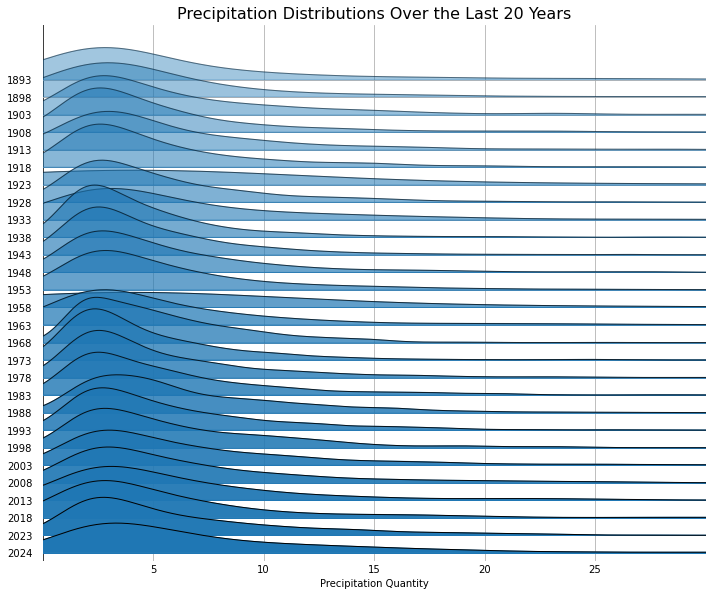

In [55]:
#do a colormap with the cumulative probability
# Create a ridge plot using joypy
plt.figure(figsize=(30, 10))
joypy.joyplot(data=plot_data, by="Year", range_style='own',overlap=1, figsize=(10, 8), grid=True,fade=True, x_range=(0, 30),alpha=0.6, linewidth=1)

# Add a title and labels
#add a line at x=0
plt.axvline(x=0, color='black', linestyle='-')
plt.title('Precipitation Distributions Over the Last 20 Years', fontsize=16)
plt.xlabel('Precipitation Quantity')
plt.show()
#print the probability 

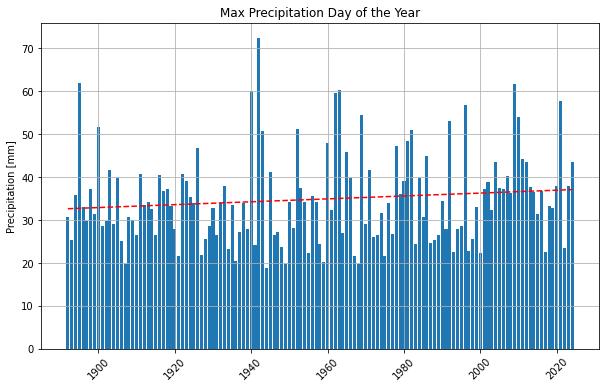

48402    43.5
Name: PRECIP_QUANTITY, dtype: float64


In [56]:
#find the maximum day of precipitation for every year
max_day = df.groupby('year')['PRECIP_QUANTITY'].idxmax()
max_precipitation = df.loc[max_day]

plt.figure(figsize=(10, 6))
plt.bar(max_precipitation['year'].astype(int)+1970, max_precipitation['PRECIP_QUANTITY'], label='Max Precipitation')
plt.ylabel('Precipitation [mm]')
plt.title('Max Precipitation Day of the Year')
plt.grid()
#add a trendline
z = np.polyfit(max_precipitation['year'].astype(int)+1970, max_precipitation['PRECIP_QUANTITY'], 1)
p = np.poly1d(z)
plt.plot(max_precipitation['year'].astype(int)+1970, p(max_precipitation['year'].astype(int)+1970), "r--", label='Trendline')
plt.xticks(rotation=45)
plt.show()
print(max_precipitation[max_precipitation['year']=='2024']['PRECIP_QUANTITY'])

In [57]:
first_year=1893
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [58]:
mean_25perc_of_tp=np.mean(tp_seasonal_year['TP']*0.25)
wd25=[]
print(mean_25perc_of_tp)
for this_year in tp_seasonal_year['year']:
    ano = f'{this_year-1}'
    ano_mas=f'{this_year}'  # Adjust for the year format
    tp_concat = pd.concat([df[(df['year'] == ano_mas) & (df['month'] < 9)],
                           df[(df['year'] == ano) & (df['month'] > 8)]])
    tp_concat_ranked=tp_concat[tp_concat['PRECIP_QUANTITY']>0].sort_values(by=['PRECIP_QUANTITY'],ascending=[False])
    cumsum = 0
    days_count = 0 
    for index, row in tp_concat_ranked.iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1 
        if cumsum > mean_25perc_of_tp:    
            wd25.append(days_count) 
            break

202.94729356060606


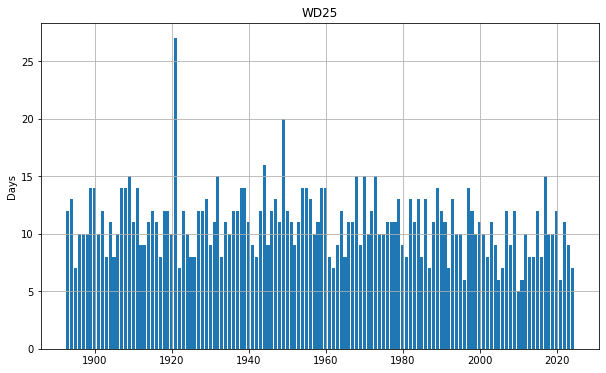

Moyenne de WD50 de 1893-2003: 11.263636363636364 et de 2004-2024: 9.142857142857142
Moyenne de WD50 de 1950-1985: 11.285714285714286 et de 1986-2024: 9.794871794871796


In [28]:
plt.figure(figsize=(10, 6))
plt.bar(years, wd25, label='Total Precipitation')
plt.ylabel('Days')
plt.title('WD25')
plt.grid()
#z = np.polyfit(years, wd50, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()
print(f'Moyenne de WD50 de 1893-2003: {np.mean(wd25[:110])} et de 2004-2024: {np.mean(wd25[111:])}')
print(f'Moyenne de WD50 de 1950-1985: {np.mean(wd25[57:92])} et de 1986-2024: {np.mean(wd25[93:])}')
